# Regression Tree (Hitters Data)

회귀 문제를 해결하는 Decision Tree의 경우 terminal node의 종속변수(y)의 평균을 예측값으로 반환하게 된다.    
예측 값의 종류는 terminal node 개수와 일치한다.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

## 1. Load Datasets

In [4]:
hitters_data = pd.read_csv('./data/Hitters.csv', index_col=0)
hitters_data.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A


In [5]:
hitters_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    obje

## 2. PreProcessing

In [6]:
# Null 값 제거
hitters_data.dropna(how='any', inplace=True)
hitters_data.shape

(263, 20)

In [7]:
# Salary(y값) log변환
hitters_data['Salary'] = np.log(hitters_data['Salary'])
hitters_data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A


## 3. Decision Tree

Decision Tree는 계산의 복잡성 대비 높은 예측 성능을 내는 것으로 알려져 있으며, 변수 단위로 설명력을 가진다는 것이 장점이다. 하지만, 결정경계(decision boundary)가 데이터 축에 수직이기 때문에 특정 데이터에서만 잘 작동하는 편이다. 이러한 문제를 해결하는 것이 Random Forest이다.

In [47]:
# Decision Tree 테스트
X = hitters_data[['Years', 'Hits']]
y = hitters_data[['Salary']]

regr_tree = tree.DecisionTreeRegressor(max_leaf_nodes=3)
regr_tree.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

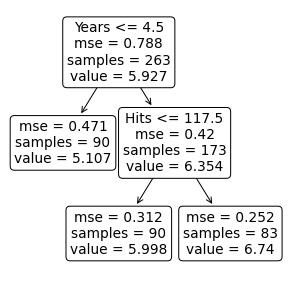

In [48]:
plt.figure(figsize=(5, 5))
tree.plot_tree(regr_tree, 
               feature_names=X.columns, 
               rounded=True)
plt.show()

----

**TIP)** *Decision Tree의 분기*

Decision Tree는 순도(Homogeneity)가 증가, 불순도(Impurity) 혹은 불확실성(Uncertainty)가 최대한 감소하는 방향으로 학습을 진행한다.    
이때, 분기에 사용하는 지표는 대표적으로 엔트로피(Entropy), 지니계수(Gini Index) 두가지가 있다.

1. 엔트로피 (Entropy)    
$Entropy(A) = -\sum_{k=1}^{m}P_{k}\log_{2}(P_{k})$

----